##Introduction

In this project I used a dataset which was made of California housing prices taken from a US census in 1990. The dataset has 10 columns and of the 10 there are 2 columns showing the location of the houses, the longitude and latitude.
Using their location and median income, I tested to see if there was a correlation between median income and home location. This way we can see if there are and determine where the different economic zones are. I believe it is important because we can see a breakdown of californian neighborhoods by their economic status and could be potentially useful for people to see if their income is enough to live in their desired area. And by creating the economic zones I was able to try and predict median income given the location of a house.

##Data

In the dataset there are 10 different features given. The longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, household, smedian_income, median_house_value, ocean_proximity. For my study I will be isolating 3 features that are related to location. The three are the longitude, latitude, and ocean_proximity since they are all related to location of the homes and to compared them I used the median income.


The median income is defined as the median income for households within a block of houses (measured in tens of thousands of US Dollars). In this dataset there is a minimum value of 0.4999 and a maximum value of 15.0001. We have the median income for 20640 households.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import sklearn.metrics as metrics

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from google.colab import files

#df = pd.read_csv('/Users/brandonwong/Downloads/housing.csv')
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['housing.csv']))

Saving housing.csv to housing.csv


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


##Methodology

I believe that there is a correlation betweeen the location of a house and its median income. And I believe that by making the economic zones we can predict the median income of a house give its location through a decision tree regression model. In order to test this I would have to see if different locations and median income group together. To do this I used K-means in order to clustering them and then created a decision tree regression model for each economic zone.

1. First, I had to clean my data by checking if there were NaN values and if they were I set them equal to zero. In addition to that we see that the data type for ocean_proximity is acutally an object not a float. In order to use this data we have to make it into a numeric value. So using the label enccoder function we can transform the non-numerical label to a numerical label.

2. Second, I needed to select the features and created a new list with the features. I then scaled the features so they had the appropriate weight using the standard scalar feature.

3. Then we can begin using the K-means clustering. K-means clustering is a type of unsupervised learning technique which groups the data into K groups. It determines K number of centroids and groups those closest to it. In order perform K-means clustering we must first determine the optimal number of clusters to use (K) and this is done by creating an elbow graph comparing the accuracy to number of clusters.

4. After applying the K-means we can check to see the different economic zone that was clustered and then append those to the original dataset.

5. Using the different economic zones we can isolate their associated location and median_income and then create a decision tree regression model. This model breaks down a dataset while developing a decision tree with if-then-else decision rules. I would then repeat it for each of the economic zones to see if we can predict the median income for each of the zones using their location information.


I choose to cluster the data first because the original data was highly spreadout so by breaking it down to different zones first, we can have the benefit of applying a decision tree regression to a smaller group, compared to  having the entirety of California as data.

##Analysis

In [ ]:
#Cleaning
df.fillna(0)
if (df.isnull() is True):
  print(df.isnull().sum())
print("No null values")

#replace str values
objs = df.select_dtypes(include=[object])
le = preprocessing.LabelEncoder()
objs2 = objs.apply(le.fit_transform)
df = df.drop(['ocean_proximity'], axis=1)
#replacing original df with the df that had its str replaced
df = df.merge(objs2,how='right',right_index=True, left_index=True)

#select features and scale
features = ['longitude','latitude', 'median_income','ocean_proximity']
df2 = df[features]
X = StandardScaler().fit_transform(df2)

No null values


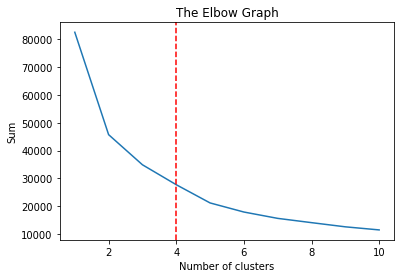

In [ ]:
# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
   kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
   kmeans.fit(X)
   wcss.append(kmeans.inertia_)  
#Plotting The Elbow graph 
#ACCURACY
plt.plot(range(1, 11), wcss)
plt.axvline(4, linestyle='--', color='r')
plt.title('The Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('Sum')
plt.show()

In [ ]:
kmeans = KMeans(init = 'k-means++', n_clusters = 4, n_init = 100)
k_predict = kmeans.fit_predict(X)
df['econ_region'] = kmeans.fit_predict(X)
df['econ_region'] = df['econ_region'].astype("category")
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,econ_region
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3,1


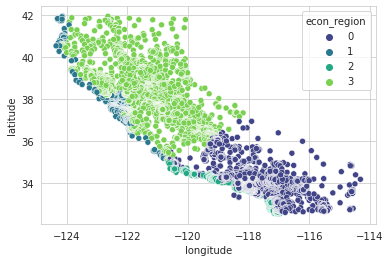

In [ ]:
sns.set_style('whitegrid')
sns.scatterplot(x=df['longitude'], y=df['latitude'], hue = df['econ_region'],data=df,palette='viridis')

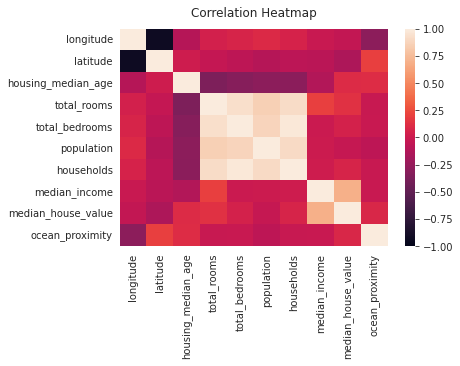

In [ ]:
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
region0 = df.loc[df['econ_region'] == 0]
y = region0['median_income']
X = region0[['longitude','latitude']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


my_new_model = RandomForestRegressor()
model0 = my_new_model.fit(X_train,y_train)
#Test
print(model0.predict([[-115.52,33.12]]))
print(model0.score(X_test, y_test))

[1.937097]
0.573738405937968


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
region0.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,econ_region
2665,-115.52,33.12,38.0,1327.0,262.0,784.0,231.0,1.8793,60800.0,1,0
2666,-115.52,33.13,18.0,1109.0,283.0,1006.0,253.0,2.1630,53400.0,1,0
2667,-115.51,33.12,21.0,1024.0,218.0,890.0,232.0,2.1010,46700.0,1,0
2668,-115.46,33.19,33.0,1234.0,373.0,777.0,298.0,1.0000,40000.0,1,0
2669,-115.51,33.24,32.0,1995.0,523.0,1069.0,410.0,1.6552,43300.0,1,0


In [ ]:
region0.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,9973.0,-118.010583,0.677520,-120.6400,-118.3400,-118.12,-117.7800,-114.3100
latitude,9973.0,34.014139,0.486447,32.6100,33.8500,34.01,34.1400,36.9500
housing_median_age,9973.0,28.690163,12.085480,1.0000,19.0000,30.00,37.0000,52.0000
total_rooms,9973.0,2722.686353,2362.179334,2.0000,1452.0000,2122.00,3200.0000,37937.0000
total_bedrooms,9869.0,564.579086,460.692574,2.0000,302.0000,442.00,667.0000,5471.0000
population,9973.0,1549.708012,1218.275943,3.0000,854.0000,1255.00,1872.0000,35682.0000
households,9973.0,522.876868,408.732219,2.0000,289.0000,419.00,621.0000,5189.0000
median_income,9973.0,3.964089,1.929519,0.4999,2.6336,3.63,4.8623,15.0001
median_house_value,9973.0,213112.963301,111298.071506,14999.0000,137200.0000,186500.00,263200.0000,500001.0000
ocean_proximity,9973.0,0.245463,0.431546,0.0000,0.0000,0.00,0.0000,2.0000


In [ ]:
region1 = df.loc[df['econ_region'] == 1]
y = region1['median_income']
X = region1[['longitude','latitude']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

model1 = my_new_model.fit(X_train,y_train)
#Test
print(model1.predict([[-122.23,37.88]]))
print(model1.score(X_test, y_test))

[8.37177825]
0.5217272252271679


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
region1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,econ_region
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3,1


In [ ]:
region1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,3155.0,-122.305363,0.438762,-124.3500,-122.42000,-122.2700,-122.1300,-120.6200
latitude,3155.0,37.781521,0.736639,35.1400,37.60000,37.7600,37.8900,41.9500
housing_median_age,3155.0,36.428209,12.816080,2.0000,27.00000,37.0000,49.0000,52.0000
total_rooms,3155.0,2510.496989,1784.229115,8.0000,1448.50000,2126.0000,3070.5000,18634.0000
total_bedrooms,3124.0,512.161972,358.695991,1.0000,289.00000,422.0000,639.2500,3226.0000
population,3155.0,1234.916640,884.259742,8.0000,713.00000,1039.0000,1504.5000,8276.0000
households,3155.0,483.420602,339.993234,1.0000,275.00000,401.0000,601.5000,3589.0000
median_income,3155.0,4.251247,2.080599,0.4999,2.89755,3.8854,5.0874,15.0001
median_house_value,3155.0,267151.498574,122558.217767,22500.0000,171250.00000,251500.0000,350000.0000,500001.0000
ocean_proximity,3155.0,3.266561,0.459115,1.0000,3.00000,3.0000,4.0000,4.0000


In [ ]:
region2 = df.loc[df['econ_region'] == 2]
y = region2['median_income']
X = region2[['longitude','latitude']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

model2 = my_new_model.fit(X_train,y_train)
#Test
print(model2.predict([[-118.55,33.99]]))
print(model2.score(X_test, y_test))

[7.941147]
0.5637962357371068


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
region2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,econ_region
5276,-118.55,33.99,39.0,2603.0,456.0,928.0,410.0,7.9096,500001.0,4,2
5595,-118.25,33.79,32.0,1205.0,340.0,1799.0,370.0,2.3750,128000.0,4,2
5596,-118.24,33.80,28.0,636.0,169.0,788.0,143.0,3.6161,131300.0,4,2
5597,-118.23,33.80,26.0,239.0,135.0,165.0,112.0,1.3333,187500.0,4,2
5610,-118.26,33.78,27.0,1672.0,491.0,1723.0,462.0,2.0458,174500.0,4,2


In [ ]:
region2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,1801.0,-117.859456,0.980613,-120.670,-118.29,-117.2600,-117.120,-116.9700
latitude,1801.0,33.315575,0.674282,32.540,32.74,33.0000,33.800,35.3200
housing_median_age,1801.0,27.551360,11.676793,2.000,18.00,27.0000,36.000,52.0000
total_rooms,1801.0,2598.961688,2141.994033,16.000,1512.00,2188.0000,3068.000,30405.0000
total_bedrooms,1782.0,553.064534,394.845646,3.000,323.25,481.5000,667.750,4585.0000
population,1801.0,1408.087174,1066.954981,8.000,809.00,1176.0000,1669.000,12873.0000
households,1801.0,515.695725,359.262053,3.000,313.00,446.0000,619.000,4176.0000
median_income,1801.0,3.822798,1.931432,0.536,2.45,3.5054,4.665,15.0001
median_house_value,1801.0,231672.422543,120348.942335,22500.000,140700.00,193500.0000,291700.000,500001.0000
ocean_proximity,1801.0,4.000000,0.000000,4.000,4.00,4.0000,4.000,4.0000


In [ ]:
region3 = df.loc[df['econ_region'] == 3]
y = region3['median_income']
X = region3[['longitude','latitude']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

model3 = my_new_model.fit(X_train,y_train)
response = model3.predict(X_test)
#Test
print(model3.predict([[-121.97,37.64]]))
print(model3.score(X_test, y_test))

[5.882608]
0.5580143574443439


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
region3.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,econ_region
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,0,3
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,0,3
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,0,3
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,0,3
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,0,3


In [ ]:
region3.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,5711.0,-121.320410,0.963970,-124.1400,-121.9300,-121.4400,-120.85500,-118.1800
latitude,5711.0,37.999748,1.099994,35.0000,37.2800,37.9600,38.63000,41.9500
housing_median_age,5711.0,24.591315,11.552228,1.0000,16.0000,23.0000,33.00000,52.0000
total_rooms,5711.0,2564.778673,2055.794105,19.0000,1429.0000,2107.0000,3130.00000,39320.0000
total_bedrooms,5658.0,500.693355,384.616920,4.0000,283.0000,417.0000,610.00000,6445.0000
population,5711.0,1319.291718,1092.869054,9.0000,716.0000,1087.0000,1616.50000,28566.0000
households,5711.0,462.596393,359.888210,2.0000,258.0000,385.0000,566.00000,6082.0000
median_income,5711.0,3.512388,1.659093,0.4999,2.3326,3.1736,4.35695,15.0001
median_house_value,5711.0,154793.112765,93023.623938,14999.0000,86900.0000,128600.0000,196350.00000,500001.0000
ocean_proximity,5711.0,0.718788,0.449630,0.0000,0.0000,1.0000,1.00000,1.0000


##Results

I was able to find correlation between the location of a house and its median income. From the elbow graph it seemed that the best number of clusters to make was 4 which can be seen by the red dotted line. With 4 clusters it wasn't too broadly grouped and it wasn't specific where the sum was almost zero. With that I was able to create economic zones and perform a decision tree regression on each zone. 

The accuracy of the 4 models ranged from 50-60% accuracy. Though the accuracy wasn't the most accurate it was able to able to come very close in predicting the median income with most within 0.2 of the actual median. This was determined when I used a longitude and latitude of the same economic region and asked the model the predict the median income. 
1. For region 0, I entered (-115.52,33.12) in the format \[longitude, latitude] which returned \[1.937097] when the actual median income was \[1.8793]. 
2. For region 1, I entered (-122.23,37.88) in which returned \[8.37177825] when the actual median income was \[8.3252]. 
3. For region 2, I entered (-118.55,33.99) in which returned \[7.941147] when the actual median income was \[7.9096]. 
4. For region 3, I entered (-121.97,37.64) in which returned \[5.882608] when the actual median income was \[6.0574].


These were all close to the original. Regions 0 and 3 were the least accurate which I believe was due to them still being very large clusters. It also seems like the zones closer to the coast had a higher average median income.


Originally, I did attempt to perform a linear regression of each of the economic zones. However the result wasn't what I expected. The accuracy was quite poor with it being between 3-4% accuracy. I believe that even though I did break down the data into smaller zones, there still was too large of a spread of data for a linear regression model to possibly cover. So I decided to choose a decision tree regressor since it was able to further break down the data and build a decision tree incrementally.

##Conclusion

Overall, I was able to cluster the longitude, latitude, ocean proximity and median income together to 4 economic regions. With each of the regions I was able to make a decision tree regression model for them. I discovered that even though K-means was sucessful in clustering based on the four factors, it still wasn't too specific. The clusters needed to be broken down even further.

Through the decision tree regression model I was able to make a successful median income prediction which can be used by entering a longitude and latitude into the model. I learned the even with the zoning there was still a large range in median income, but seemed like region 0 had the highest average median income of 4.25 and the lowest belonged to region 2. Region two also had the lowest average proxmity and region 0 had the second highest. Those with higher median incomes tend to live near the ocean. I believe that this is quite similar to my personal experiences as I've seen that beach homes are quite expensive compared to those closer inland.

##References

1. Dataset - California Housing Prices
https://www.kaggle.com/datasets/camnugent/california-housing-prices 

2. Decison Tree Regressor, Sklearn
https://scikit-learn.org/stable/modules/tree.html#tree

3. Visuaization Help, Seaborn 
https://seaborn.pydata.org/examples/many_pairwise_correlations.html


